In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

%matplotlib inline
sns.set()

In [29]:
titanic_train = pd.read_csv('data/titanic-train.csv')
titanic_test = pd.read_csv('data/titanic-test.csv')

In [30]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
titanic_train.shape

(891, 12)

In [32]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


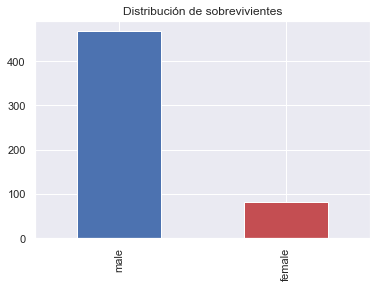

In [33]:
titanic_train[titanic_train['Survived'] == 0]['Sex'].value_counts().plot(kind='bar', color=['b','r'])
plt.title('Distribución de sobrevivientes')
plt.show()

In [34]:
label_encoder = preprocessing.LabelEncoder()

encoder_sex = label_encoder.fit_transform(titanic_train['Sex'])
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].mean())
titanic_train['Embarked'] = titanic_train['Embarked'].fillna('S')

In [36]:
train_predictors = titanic_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
train_predictors.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [37]:
categorical_cols = [cname for cname in train_predictors.columns 
                    if train_predictors[cname].nunique() < 10 and train_predictors[cname].dtype == 'object']
numerical_cols = [cname for cname in train_predictors.columns 
                  if train_predictors[cname].dtype in ['int64', 'float64']]
my_cols = categorical_cols + numerical_cols

In [38]:
train_predictors = train_predictors[my_cols]

In [39]:
train_predictors.head()

,Sex,Embarked,Pclass,Age,SibSp,Parch,Fare
0,male,S,3,22.0,1,0,7.2500
1,female,C,1,38.0,1,0,71.2833
2,female,S,3,26.0,0,0,7.9250
3,female,S,1,35.0,1,0,53.1000
4,male,S,3,35.0,0,0,8.0500


In [40]:
dummy_encoded_train_predictors = pd.get_dummies(train_predictors)

In [41]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [42]:
y_target = titanic_train['Survived'].values
x_features_one = dummy_encoded_train_predictors.values

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_features_one, y_target, test_size=0.25, random_state=1)

In [46]:
tree_one = tree.DecisionTreeClassifier()
tree_one = tree_one.fit(x_features_one, y_target)
tree_one_accuracy = round(tree_one.score(x_features_one, y_target), 4)
print(f'Accuracy: {round(tree_one_accuracy, 4)}')

Accuracy: 0.982


In [49]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

out = StringIO()
tree.export_graphviz(tree_one, out_file=out)

graph = pydotplus.graph_from_dot_data(out.getvalue())
graph.write_png('titanic.png')

InvocationException: GraphViz's executables not found